# Clase 6 - Reconocimiento de Patrones en Imagenes

Esta clase aborda el análisis de imágenes mediante el uso de matrices de intensidad y el cálculo de momentos geométricos, centrales y de Hu. Estos conceptos permiten extraer información relevante sobre la forma, posición y características invariantes de los objetos presentes en la imagen.

- **Matrices de intensidad:** Representan los valores de los píxeles de una imagen, permitiendo distinguir regiones y calcular estadísticas como promedios y umbrales.
- **Momentos geométricos:** Son sumas ponderadas de las posiciones de los píxeles, útiles para calcular el área, centroide y otras propiedades básicas de la imagen.
- **Momentos centrales:** Se calculan respecto al centroide y son invariantes a la posición de la imagen.
- **Momentos de Hu:** Combinaciones de momentos centrales que son invariantes a traslación, escala y rotación, útiles para reconocimiento de patrones.
- **Escalado de imágenes:** Permite modificar el tamaño de la imagen para facilitar la visualización o el procesamiento posterior.

El código implementa estos conceptos para analizar y comparar regiones de la imagen, calcular características invariantes y visualizar el resultado del escalado.

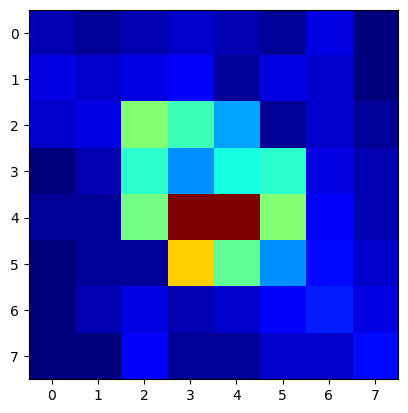

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

im =[[2,  1,  2,  3,  2,  1,  4,  0],
    [4,  3,  4,  5,  1,  4,  3,  0],
    [3,  4, 23, 19, 13,  1,  3,  1],
    [0,  2, 18, 12, 17, 18,  4,  2],
    [1,  1, 22, 45, 45, 23,  5,  2],
    [0,  1,  1, 31, 21, 12,  6,  3],
    [0,  2,  4,  2,  3,  5,  7,  4],
    [0,  0,  5,  1,  1,  3,  3,  6]]

#transformamos los datos a uint8
image = np.array(im, dtype='uint8')

plt.figure()
plt.imshow(image, cmap='jet')
plt.show()

In [46]:
# Matriz Booleana
filtro = image > 7

Gr = np.mean(image[filtro])
print(Gr)

#Ge = np.mean(image[~filtro])
Ge = np.mean(image[np.bitwise_not(filtro)])
print(Ge)

22.785714285714285
2.5


In [47]:
# 
K1 = (Gr - Ge) / Ge
print(K1)

#
K2 = (Gr - Ge) / (Gr + Ge)
print(K2)

K3 = np.log(Gr / Ge)
print(K3)

8.114285714285714
0.8022598870056498
2.209843041295431


In [48]:
def Momento (r, s, img, f):
    
    R = np.argwhere(img>f)
    i = R[:,0]
    j = R[:,1]

    return np.sum((i**r) * (j**s) * img[i,j])

def Momento_central(r, s, img , f):

    R = np.argwhere(img>f)
    i = R[:,0]
    j = R[:,1]
    i0 = Momento(1,0,img,f)/ Momento(0,0,img,f)
    j0 = Momento(0,1,img,f)/ Momento(0,0,img,f)

    return np.sum((i - i0)**r * (j - j0)**s * img[i,j])

print(Momento_central(2,2,image,7))

centro = [Momento(1,0,image,7)/ Momento(0,0,image,7) , Momento(0,1,image,7)/ Momento(0,0,image,7)]
print(centro)

279.5781022525612
[np.float64(3.652037617554859), np.float64(3.4357366771159876)]


In [49]:
def Momento_Hu (r, s, img, f):
    t= (r+s)/2 + 1
    return Momento_central(r,s,img,f) / Momento_central(0,0,img,f)**t

Fhi1 = Momento_Hu(2,0,image,7) + Momento_Hu(0,2,image,7)
print(Fhi1 )

Fhi2 = (Momento_Hu(2,0,image,7) - Momento_Hu(0,2,image,7))**2 + 4*Momento_Hu(1,1,image,7)**2
print(Fhi2)

Fhi3 = (Momento_Hu(3,0,image,7) - 3*Momento_Hu(1,2,image,7))**2 + (3*Momento_Hu(2,1,image,7) - Momento_Hu(0,3,image,7))**2
print(Fhi3)

0.006100655235595828
2.372254189905715e-06
1.2384724158592536e-08


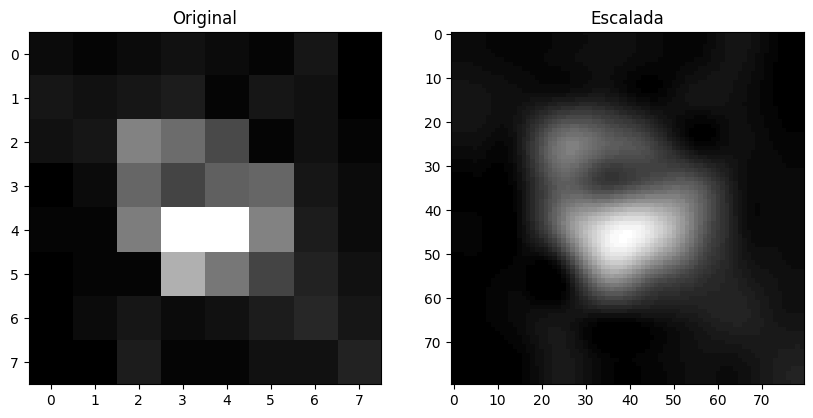

In [52]:
fil, col = image.shape
resize = cv2.resize(image, (col*10, fil*10), interpolation=cv2.INTER_BITS2)

#Comparacion con original
fig, ax = plt.subplots(1,2)
fig.set_figwidth(10)
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(resize, cmap='gray')
ax[1].set_title('Escalada')
plt.show()